In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import sqlite3
import statsmodels.api as sm
%matplotlib inline

In [2]:
con = sqlite3.connect("nflPPdb.sqlite")
players = pd.read_sql_query('SELECT * FROM players', con)
combine = pd.read_sql_query('SELECT * FROM combine', con)
rr = pd.read_sql_query('SELECT * FROM rr', con)
passing = pd.read_sql_query('SELECT * FROM passing', con)

In [3]:
rr['total_yards'] = rr['receiving_yards'] + rr['rushing_yards']
ydsData = rr[rr['position'].isin(['QB' , 'RB' , 'qb' , 'rb'])]
ydsData = ydsData.set_index(ydsData['name'])
ydsData = ydsData.groupby(['name'])['total_yards', 'receiving_yards','rushing_yards'].sum()
ydsData = ydsData.dropna()
ydsData = ydsData.drop_duplicates()

In [4]:
combineData = combine[combine['position'].isin(['QB' , 'RB', 'qb' , 'rb'])]
combineData = combineData.set_index(combineData['name'])
combineData = combineData[['speedscore','BMI']]
combineData = combineData.drop_duplicates()

In [5]:
regdata = pd.concat([combineData[0:120],ydsData[0:120]],axis=1)
regdata = regdata.dropna()
regdata

,speedscore,BMI,total_yards,receiving_yards,rushing_yards
Aaron Brooks,90.676491,25.304709,174,1,1534
Aaron Stecker,76.536367,30.857143,659,211,448
Amos Zereoue,96.412474,31.608997,2555,935,1620
Anthony Thomas,104.088696,30.109569,3305,377,2928
Chad Pennington,85.562836,28.545706,116,7,420
Correll Buckhalter,107.336054,30.534810,2273,503,1770
Daunte Culpepper,122.184590,31.786704,416,0,2626
Derrick Blaylock,107.370696,28.506122,785,246,539
Deuce McAllister,117.389327,29.994370,7452,1539,5913
Donovan McNabb,96.219465,29.320672,1123,-1,3146


In [6]:
mod = sm.OLS(regdata['speedscore'],regdata['total_yards'])

In [7]:
res = mod.fit()

In [8]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:             speedscore   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     7.799
Date:                Wed, 09 Mar 2016   Prob (F-statistic):             0.0175
Time:                        10:41:04   Log-Likelihood:                -69.195
No. Observations:                  12   AIC:                             140.4
Df Residuals:                      11   BIC:                             140.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
total_yards     0.0140      0.005      2.793      

/Users/long/miniconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


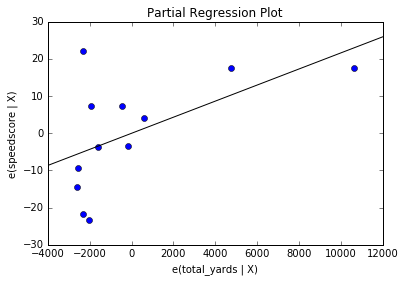

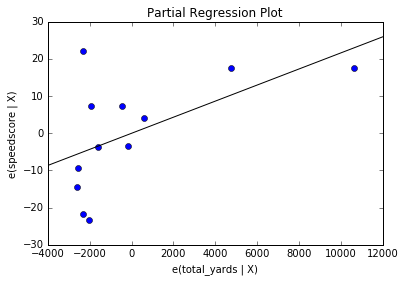

In [9]:
sm.graphics.plot_partregress('speedscore', 'total_yards', [], data = regdata, obs_labels=False)

In [ ]:
X = regdata[['speedscore','BMI']]
Y = regdata['total_yards']
X = sm.add_constant(X)
mod2 = sm.OLS(Y,X)

In [ ]:
res2 = mod2.fit()

In [ ]:
xx1, xx2 = np.meshgrid(np.linspace(regdata['speedscore'].min(), regdata['speedscore'].max(), 100), 
                       np.linspace(regdata['BMI'].min(), regdata['BMI'].max(), 100))

In [ ]:
res2.params

In [ ]:
Z = res2.params[0] + res2.params[1] * xx1 + res2.params[2] * xx2

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
resid = Y - res2.predict(X)
ax.scatter(X[resid >= 0]['speedscore'], X[resid >= 0]['BMI'], Y[resid >= 0], c='r',
            marker = 'o')
ax.scatter(X[resid < 0]['speedscore'], X[resid < 0]['BMI'], Y[resid < 0], color='black', alpha=1.0)
ax.set_xlabel('speedscore')
ax.set_ylabel('BMI')
ax.set_zlabel('Totalyards')

In [ ]:
resid

In [ ]:
combine_sort = combine.groupby(['college'])['index'].count()
combine_sort = combine_sort.sort_values(ascending =False)
combine_sort[0:10].plot(kind = 'Bar')